In [1]:
import pandas as pd

import pandas as pd
import numpy as np
import os
import sys
sys.path.append('./data_analysis')

if 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/preprocessed/grouped/'
destination_folder_path = data_folder + 'charts/remove_outliers/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')

from modules.DataPreparation import DataPreparation
dp = DataPreparation()

covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)

trips = dp.transform_to_datetime(trips, ['date'])
trips = dp.transform_to_time_series(trips, 'date', drop = False)

trips_and_covid = pd.merge(trips, covid_data, left_index=True,
                            right_index=True, how = 'left')

trips_and_covid['date_trips'] = trips_and_covid.index

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def find_best_ploy_fit(trips, variable, poly_degree = 1, period = '', filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))
    x1 = df.loc[:os.environ['FIRST_DAY_COVID'],'range']
    y1 = df.loc[:os.environ['FIRST_DAY_COVID'], variable]

    x2 = df.loc[os.environ['FIRST_DAY_COVID']:,'range']
    y2 = df.loc[os.environ['FIRST_DAY_COVID']:, variable]

    # x3 = df.loc['2021-11':,'range']
    # y3 = df.loc['2021-11':, variable]

    index = [i for i in range(len(df))]

    coeffs1 = np.polyfit(x1, y1, poly_degree)
    print()
    poly_eqn = np.poly1d(coeffs1)
    y_hat1 = poly_eqn(x1)

    coeffs2 = np.polyfit(x2, y2, poly_degree)
    poly_eqn = np.poly1d(coeffs2)
    y_hat2 = poly_eqn(x2)

    # coeffs = np.polyfit(x3, y3, poly_degree)
    # poly_eqn = np.poly1d(coeffs)
    # y_hat3 = poly_eqn(x3)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    # y_hat1 = np.pad(y_hat1, (None,len(index) - len(y_hat1)))
    y_hat1 = np.concatenate((y_hat1,[None]*(len(df.index) - len(y_hat1))))
    y_hat2 = np.concatenate(([None]*(len(df.index) - len(y_hat2)), y_hat2))
    # y_hat2 = np.concatenate(([None]*(len(x1)), y_hat2, [None]*(len(x3))))
    # y_hat3 = np.concatenate(([None]*(len(df.index) - len(y_hat3)), y_hat3))
    plt.plot(df.index,y_hat1)
    plt.plot(df.index,y_hat2)
    # plt.plot(df.index,y_hat3)
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime(os.environ['FIRST_DAY_COVID']), color="black", linestyle="--",  label='Início da quarentena')

    title = 'Monthly variation of variable {variable}'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=22, pad = 10)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return coeffs1,coeffs2

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

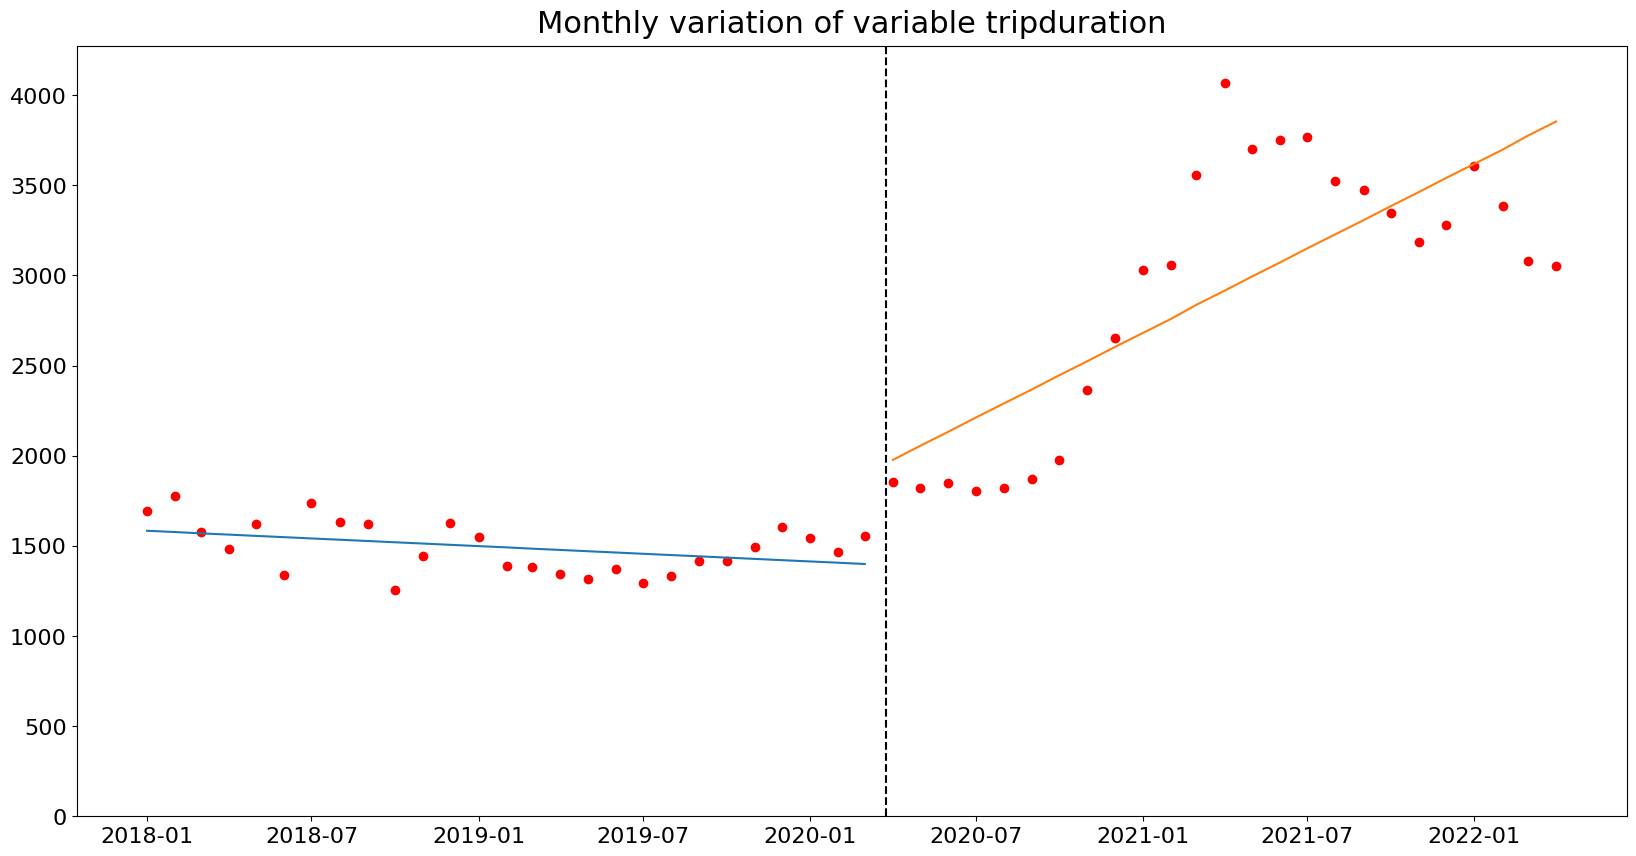

In [5]:
variable = 'tripduration'
coeffs = find_best_ploy_fit(trips, variable, 1, 'Before Covid for ', 'before', False)

In [11]:
df = trips.copy(deep=True)
df = df['2018-02':]
df['tripduration_sec'] = df['tripduration'].apply(lambda x : x/60)

In [12]:
df

,date,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,range,tripduration_sec
date,,,,,,,,,,,,
2018-02-01,2018-02-01,13344,1774.028374,18.569040,17.529425,NaN,13.633094,2.703312,0.172662,0.032224,1,29.567140
2018-03-01,2018-03-01,24889,1575.750603,16.963756,16.993008,NaN,13.020933,2.663104,0.157660,0.014183,2,26.262510
2018-04-01,2018-04-01,32386,1479.865863,20.674716,20.473042,NaN,13.341382,2.464120,0.136355,0.027790,3,24.664431
2018-05-01,2018-05-01,68695,1623.848603,53.345687,53.443712,NaN,13.521828,2.491608,0.141713,0.072218,4,27.064143
2018-06-01,2018-06-01,92508,1340.546495,59.543914,58.059387,NaN,13.664440,2.519501,0.136042,0.000000,5,22.342442
2018-07-01,2018-07-01,112047,1740.148825,65.787734,63.875300,NaN,13.602167,2.556052,0.176979,0.024383,6,29.002480
2018-08-01,2018-08-01,137359,1630.027234,64.914536,63.809777,NaN,13.650303,2.525215,0.121506,0.000000,7,27.167121
2018-09-01,2018-09-01,161500,1623.839089,66.580790,64.723008,NaN,13.669412,2.724378,0.218693,0.023777,8,27.063985
2018-10-01,2018-10-01,165162,1257.122307,60.856594,59.154490,NaN,14.163712,2.153752,0.100828,0.017746,9,20.952038


In [13]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def find_best_ploy_fit_trip_duration(trips, variable, poly_degree = 1, filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2018-02':]
    df = trips.copy(deep=True)
    df = df['2018-02':]
    df['tripduration_min'] = df['tripduration'].apply(lambda x : x/60)
    variable = 'tripduration_min'
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))
    x1 = df.loc[:os.environ['FIRST_DAY_COVID'],'range']
    y1 = df.loc[:os.environ['FIRST_DAY_COVID'], variable]

    x2 = df.loc['2020-03-25':'2020-8','range']
    y2 = df.loc['2020-03-25':'2020-8', variable]

    x3 = df.loc['2020-9':'2021-4','range']
    y3 = df.loc['2020-9':'2021-4', variable]

    x4 = df.loc['2021-5':,'range']
    y4 = df.loc['2021-5':, variable]

    coeffs1 = np.polyfit(x1, y1, poly_degree)
    poly_eqn = np.poly1d(coeffs1)
    y_hat1 = poly_eqn(x1)

    coeffs2 = np.polyfit(x2, y2, poly_degree)
    poly_eqn = np.poly1d(coeffs2)
    y_hat2 = poly_eqn(x2)

    coeffs3 = np.polyfit(x3, y3, poly_degree)
    poly_eqn = np.poly1d(coeffs3)
    y_hat3 = poly_eqn(x3)

    coeffs4 = np.polyfit(x4, y4, poly_degree)
    poly_eqn = np.poly1d(coeffs4)
    y_hat4 = poly_eqn(x4)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    # y_hat1 = np.pad(y_hat1, (None,len(index) - len(y_hat1)))
    y_hat1 = np.concatenate((y_hat1,[None]*(len(df.index) - len(y_hat1))))
    # y_hat2 = np.concatenate(([None]*(len(df.index) - len(y_hat2)), y_hat2))
    y_hat2 = np.concatenate(([None]*(len(x1)), y_hat2, [None]*(len(x3) + len(x4))))
    y_hat3 = np.concatenate(([None]*(len(x1) + len(x2)), y_hat3, [None]*(len(x4))))
    y_hat4 = np.concatenate(([None]*(len(df.index) - len(y_hat4)), y_hat4))
    plt.plot(df.index,y_hat1)
    plt.plot(df.index,y_hat2)
    plt.plot(df.index,y_hat3)
    plt.plot(df.index,y_hat4)
    plt.ylim(bottom=0)
    plt.xlim(left=datetime.date(2018,1,1))
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime(os.environ['FIRST_DAY_COVID']), color="black", linestyle="--",  label='Lockdown in SP (2020-03-24)')
    # ax.axvline(pd.to_datetime('2020-09-01'), color="black", linestyle="--",  label='Criação plano profissional')
    # ax.axvline(pd.to_datetime('2021-05-01'), color="black", linestyle="--",  label='Criação plano profissional')

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('Trip duration (min)', color='k', fontsize=22, labelpad = 10)

    title = 'Average trip duration'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax.legend(loc = 'lower right',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename)
    return coeffs1,coeffs2, coeffs3, coeffs4

KeyError: 'tripduration_min'

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

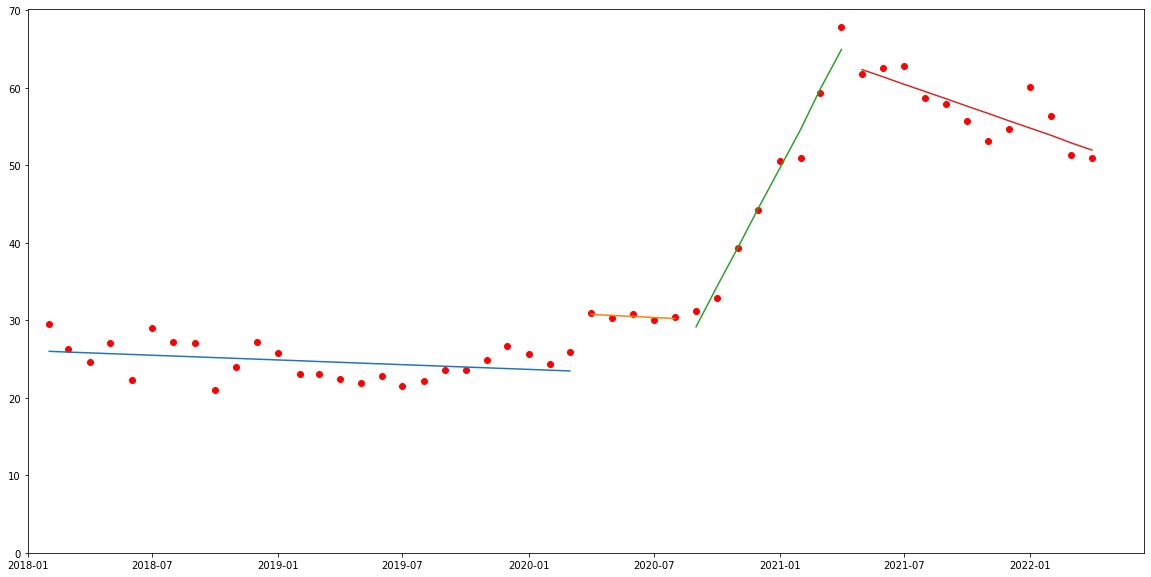

In [14]:
variable = 'tripduration'
coeffs = find_best_ploy_fit_trip_duration(trips, variable, 1, 'before', False)

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.concatenate((a,b))

array([1, 2, 3, 4, 5, 6])

In [ ]:
c = np.append(a,b)
c = np.append(c,b)
c

array([1, 2, 3, 4, 5, 6, 4, 5, 6])

In [ ]:
y_hats[0]

array([25.99429932, 25.89297403, 25.79164873, 25.69032344, 25.58899814,
       25.48767285, 25.38634756, 25.28502226, 25.18369697, 25.08237167,
       24.98104638, 24.87972108, 24.77839579, 24.67707049, 24.5757452 ,
       24.4744199 , 24.37309461, 24.27176931, 24.17044402, 24.06911872,
       23.96779343, 23.86646813, 23.76514284, 23.66381754, 23.56249225,
       23.46116695])

In [ ]:
y_hats

[array([25.99429932, 25.89297403, 25.79164873, 25.69032344, 25.58899814,
        25.48767285, 25.38634756, 25.28502226, 25.18369697, 25.08237167,
        24.98104638, 24.87972108, 24.77839579, 24.67707049, 24.5757452 ,
        24.4744199 , 24.37309461, 24.27176931, 24.17044402, 24.06911872,
        23.96779343, 23.86646813, 23.76514284, 23.66381754, 23.56249225,
        23.46116695]),
 array([30.76115842, 30.62728708, 30.49341575, 30.35954441, 30.22567308]),
 array([29.15025917, 34.26208683, 39.37391449, 44.48574216, 49.59756982,
        54.70939748, 59.82122515, 64.93305281]),
 array([62.34167908, 61.39840024, 60.4551214 , 59.51184256, 58.56856372,
        57.62528488, 56.68200604, 55.7387272 , 54.79544836, 53.85216952,
        52.90889068, 51.96561184])]

In [21]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def find_best_ploy_fit_trip_duration_gen(trips, variable, break_dates = [os.environ['FIRST_DAY_COVID']],
                                        poly_degree = 1, save = True, filename = ''):
    plt.clf()
    plt.figure(figsize =(12, 8))
    df = trips.copy(deep=True)
    df['range'] = list(range(len(df)))

    xs = []
    ys = []
    coeffs = []
    y_hats = []
    if len(break_dates) > 0:
        for i in range(len(break_dates) + 1):
            if i == 0:
                x = df.loc[:break_dates[i],'range']
                y = df.loc[:break_dates[i], variable]
            else:
                start_date = pd.to_datetime(break_dates[i-1]) + datetime.timedelta(days=1)
                if i == len(break_dates):
                    x = df.loc[start_date:,'range']
                    y = df.loc[start_date:, variable]
                else:
                    x = df.loc[start_date:break_dates[i],'range']
                    y = df.loc[start_date:break_dates[i], variable]
            xs.append(x)
            ys.append(y)
            coeff = np.polyfit(x, y, poly_degree)
            poly_eqn = np.poly1d(coeff)
            y_hat = poly_eqn(x)
            coeffs.append(coeff)
            y_hats.append(y_hat)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')

    for i in range(len(y_hats)):
        extended_y_hat = []
        for j in range(len(y_hats)):
            if i == j:
                extended_y_hat = np.append(extended_y_hat, y_hats[i])
            else:
                extended_y_hat = np.append(extended_y_hat, [None]*len(xs[j]))
        y_hats[i] = extended_y_hat
    
    for y_hat in y_hats:
        plt.plot(df.index,y_hat)
    plt.ylim(bottom=0)
    plt.xlim(left=datetime.date(2018,1,1))
    plt.ylim(top=trips[variable].max()*1.05)
    for break_date in break_dates:
        ax.axvline(pd.to_datetime(break_date), color="black", linestyle="--",  label=break_date)

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('{variable}'.format(variable = variable), color='k', fontsize=22, labelpad = 10)

    title = 'Linear fit for {variable} variable'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    # ax.legend(loc = 'lower right',fontsize = 22)
    ax.legend(loc = 'upper left',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename)
    return coeffs

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

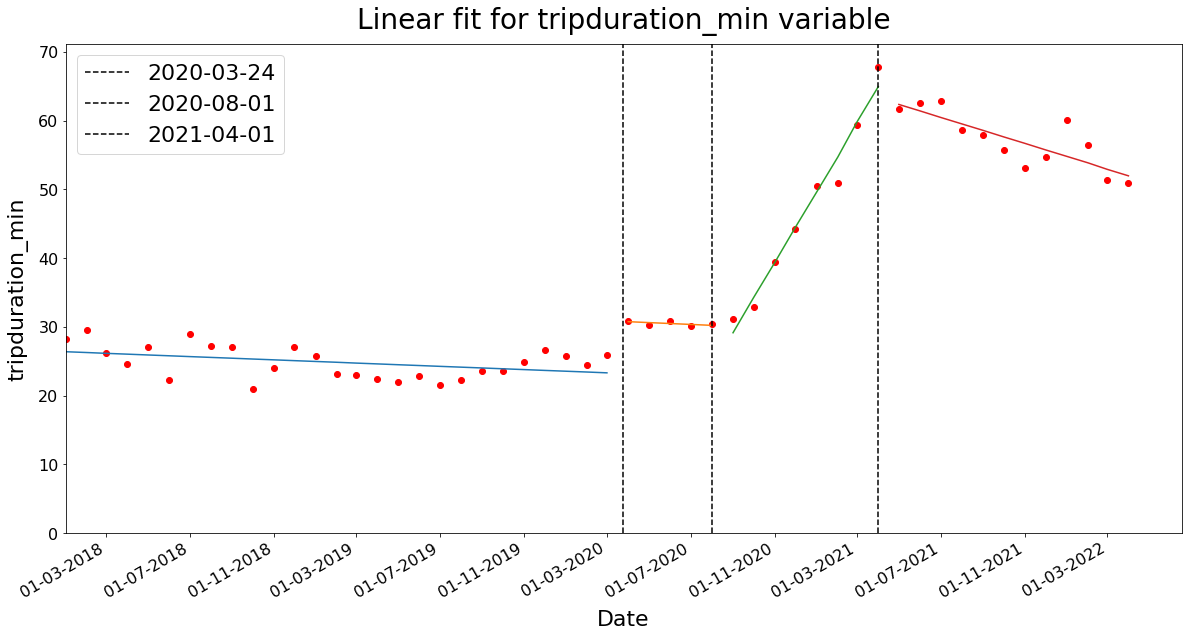

In [22]:
trips['tripduration_min'] = trips['tripduration'].apply(lambda x : x/60)
variable = 'tripduration_min'
break_dates = [os.environ['FIRST_DAY_COVID'], '2020-08-01','2021-04-01']

coeffs = find_best_ploy_fit_trip_duration_gen(trips, variable, break_dates = break_dates,
                                            poly_degree = 1, save = False)

In [18]:
coeffs

[array([-0.11812974, 26.3925032 ]),
 array([-0.13387133, 34.37568443]),
 array([   5.11182766, -134.42822606]),
 array([ -0.94327884, 100.07283268])]

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

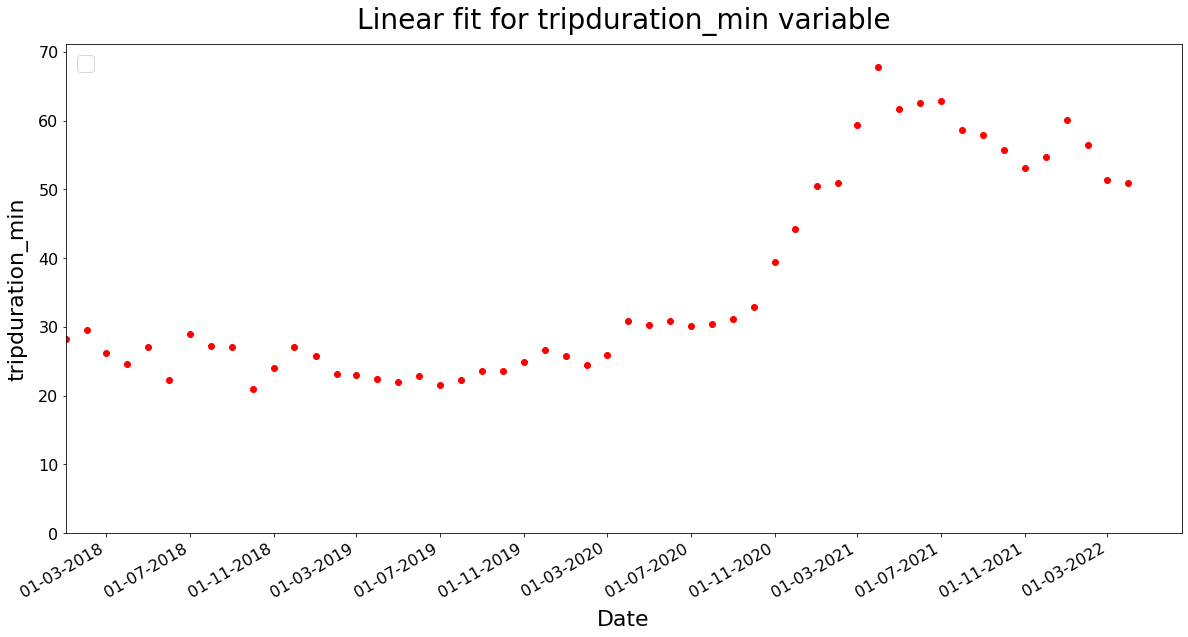

In [ ]:
trips['tripduration_min'] = trips['tripduration'].apply(lambda x : x/60)
variable = 'tripduration_min'
break_dates = []

y_hats = find_best_ploy_fit_trip_duration_gen(trips, variable, break_dates = break_dates,
                                            poly_degree = 1, save = False)

In [ ]:
coeffs

[array([-0.10132529, 25.99429932]),
 array([-0.13387133, 34.2418131 ]),
 array([   5.11182766, -129.3163984 ]),
 array([-0.94327884, 99.12955384])]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_trip_duration(trips, variable, poly_degree = 1, filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    df['tripduration_min'] = df['tripduration'].apply(lambda x : x/60)
    variable = 'tripduration_min'
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime(os.environ['FIRST_DAY_COVID']), color="black", linestyle="--",  label='Lockdown in SP (2020-03-24)')
    # ax.axvline(pd.to_datetime('2020-09-01'), color="black", linestyle="--",  label='Criação plano profissional')
    # ax.axvline(pd.to_datetime('2021-05-01'), color="black", linestyle="--",  label='Criação plano profissional')

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('Trip duration (min)', color='k', fontsize=22, labelpad = 10)

    title = 'Average trip duration'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax.legend(loc = 'lower right',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return 0

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

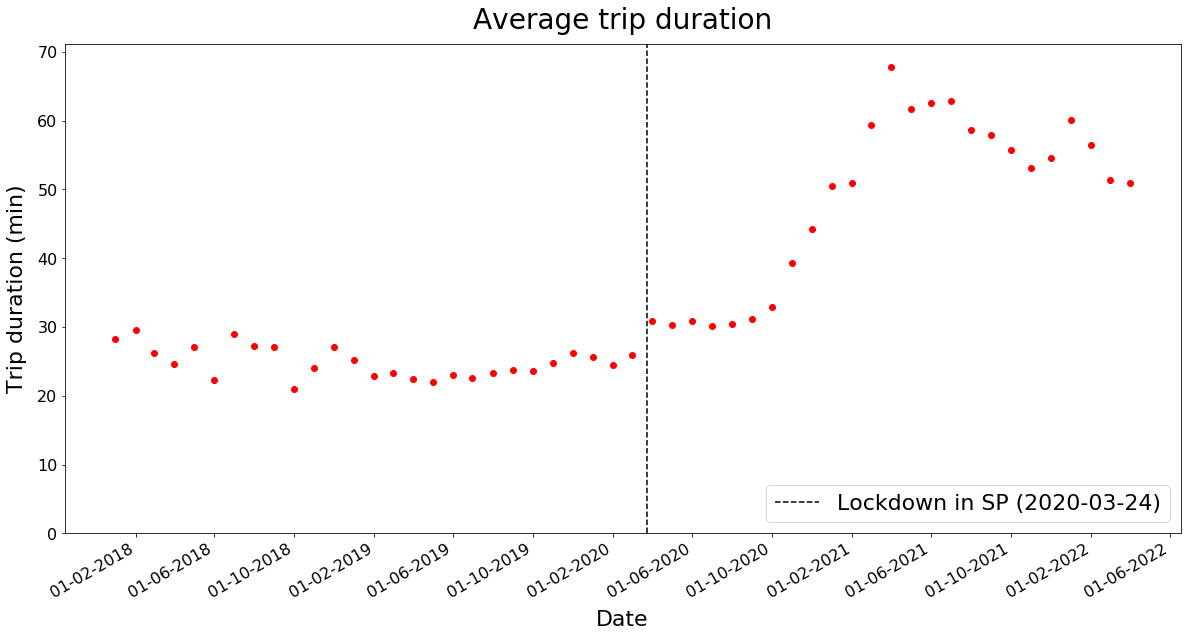

In [ ]:
variable = 'tripduration'
coeffs = plot_trip_duration(trips, variable, 1, 'before', False)